# 라이브러리 및 데이터 불러오기

In [40]:
import pandas as pd
import lightgbm as lgb
import numpy as np


# 데이터 불러오기
path = "/content/drive/MyDrive/Colab Notebooks/데이콘-영화관객/"
train = pd.read_csv(path+'movies_train.csv')
test = pd.read_csv(path+'movies_test.csv')
submission = pd.read_csv(path +'submission.csv')

# Exploratory Data Analysis(EDA)
탐색적 자료 분석

In [2]:
train.head() # 데이터 프레임의 위에서부터 n개 행을 보여주는 함수 (n의 디폴트는 5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [4]:
print(train.columns) # 열의 정보를 보여주는 속성
print(submission.columns)

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')
Index(['title', 'box_off_num'], dtype='object')


title : 영화의 제목

distributor : 배급사

genre : 장르

release_time : 개봉일

time : 상영시간(분)

screening_rat : 상영등급

director : 감독이름

dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

num_staff : 스텝수

num_actor : 주연배우수

box_off_num : 관객수

In [5]:
train.tail() # 아래에서부터 n개 행을 보여주는 함수 (n의 기본값은 5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
print(train.shape)  # 행의 개수와 열의 개수가 저장되어있는 속성
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [7]:
train.info()  # column별 정보를 알려주는 함수 
#비어있지 않은 (non-null)값은 몇개인지? column의 타입은 무엇인지?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


dir_prev_bfnum (해당 감독이 이전에 만든 영화의 관객 수)에 결측치가 있다

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


dir_prev_bfnum (해당 감독이 이전에 만든 영화의 관객 수)에 결측치가 있다

In [9]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        243 non-null    object
 1   box_off_num  243 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


**수치변수들 통게량 확인**

In [10]:
train.describe().T # 숫자형 column들의 기술 통계량을 보여주는 함수

,count,mean,std,min,25%,50%,75%,max
time,600.0,1.008633e+02,1.809753e+01,45.0,89.00,100.000,114.000,180.0
dir_prev_bfnum,270.0,1.050443e+06,1.791408e+06,1.0,20380.00,478423.625,1286568.625,17615314.0
dir_prev_num,600.0,8.766667e-01,1.183409e+00,0.0,0.00,0.000,2.000,5.0
num_staff,600.0,1.511183e+02,1.656547e+02,0.0,17.00,82.500,264.000,869.0
num_actor,600.0,3.706667e+00,2.446889e+00,0.0,2.00,3.000,4.000,25.0
box_off_num,600.0,7.081818e+05,1.828006e+06,1.0,1297.25,12591.000,479886.750,14262766.0


count: 해당 column에서 비어 있지 않은 값의 개수

mean: 평균

std: 표준편차

min: 최솟값 (이상치 포함)

25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값

50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)

75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값

max: 최댓값 (이상치 포함)

In [11]:
pd.options.display.float_format = '{:.5f}'.format  # 지수표현 없이 실수로 표현하는 옵션 변경

*장르별 관객수*

In [12]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')
# train의 열 장르와 관객수에 대해 장르별로 묶어 관객수를 평균을 내서 관객수 순으로 표시

,box_off_num
genre,
뮤지컬,6627.00000
다큐멘터리,67172.25806
서스펜스,82611.00000
애니메이션,181926.66667
멜로/로맨스,425968.03846
미스터리,527548.17647
공포,590832.52381
드라마,625689.79186
코미디,1193914.00000


**변수간 상관계수 확인**

In [13]:
# heatmap 사용 불가 시
corr_mat = train.corr()
corr_mat['box_off_num'].sort_values(ascending = False)  # 관객수와의 상관 계수를 높은 순으로 출력

box_off_num      1.00000
num_staff        0.54426
time             0.44145
dir_prev_bfnum   0.28318
dir_prev_num     0.25967
num_actor        0.11118
Name: box_off_num, dtype: float64

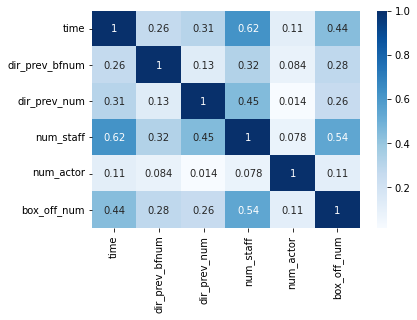

In [14]:
# heatmap 사용
import seaborn as sns
sns.heatmap(train.corr(),annot = True,cmap = 'Blues')

**히스토그램으로 변수 분포 확인**

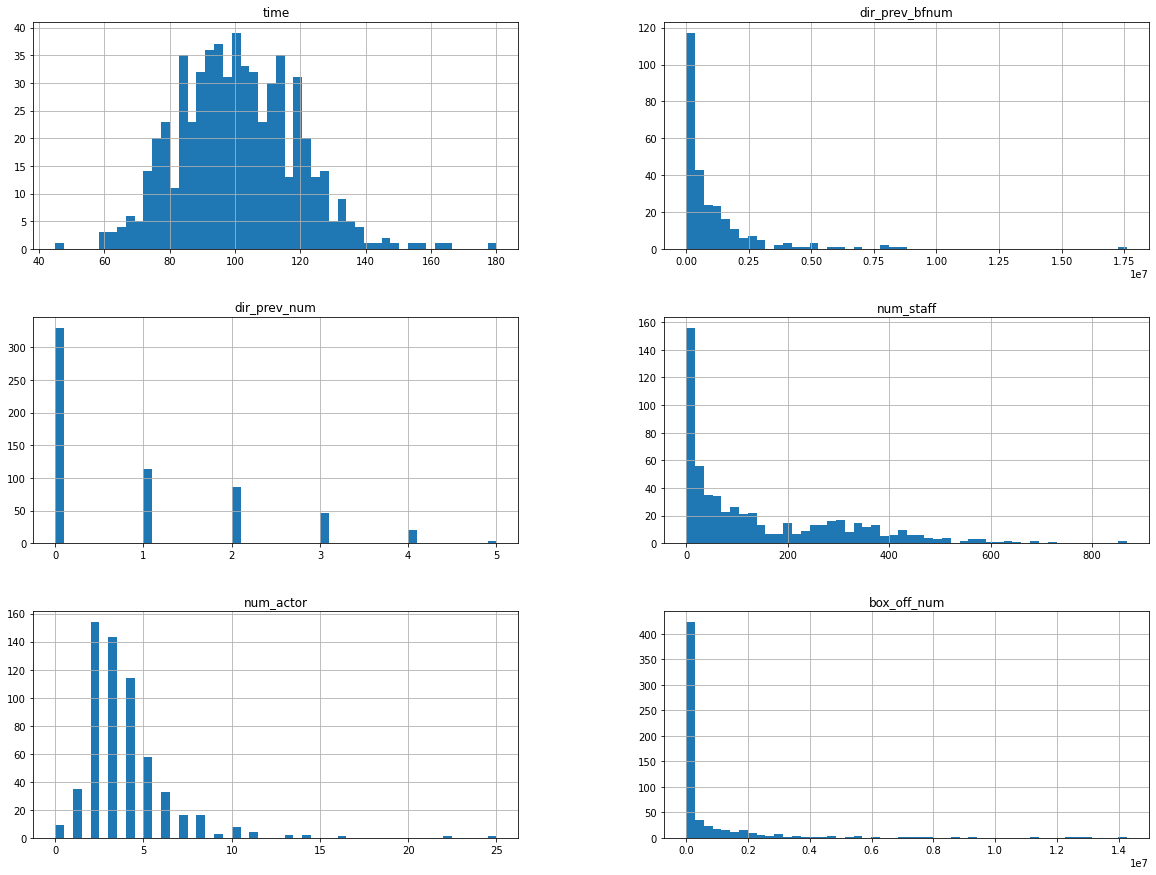

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

train.hist(bins = 50, figsize = (20,15))
plt.show()

# 데이터 전처리

**결측치 여부 확인**

In [16]:
# 결측치 여부 확인
train.isna().sum()  # 결측치 개수

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [17]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_bfnum']  # train의 dir_prev_bfnum column에 결측인 것들을 train에서 모아 dir_prev_bfnum column으로 표시

0     nan
6     nan
8     nan
9     nan
10    nan
       ..
593   nan
594   nan
597   nan
598   nan
599   nan
Name: dir_prev_bfnum, Length: 330, dtype: float64

In [18]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_bfnum']  # test의 dir_prev_bfnum column에 결측인 것들을 train에서 모아 dir_prev_bfnum column으로 표시

5     nan
6     nan
7     nan
8     nan
9     nan
       ..
235   nan
237   nan
239   nan
240   nan
242   nan
Name: dir_prev_bfnum, Length: 136, dtype: float64

**결측치 채우기**

In [19]:
test['dir_prev_bfnum'].fillna(0, inplace = True)  # 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값 0

감독이 신인이므로 이전 작품 관객 수를 0으로 채움

# 변수 선택 및 모델 구축

**Feature Engineering & Initial Modeling**

In [20]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators= 1000)

Light GBM이란?
LGBM은 Gradient Boosting 프레임워크로 트리 기반 학습 알고리즘입니다.
기존의 트리 알고리즘과 다르게 수평적으로 확장됩니다.
큰 데이터 세트를 다루는데 적합하며 적은 메모리를 차지합니다.
결과의 정확도에 초점을 맞춰 GPU학습을 지원하기 때문에 LGBM이 폭넓게 사용됩니다.


In [21]:
features = ['time','dir_prev_num','num_staff','num_actor']  # 변수 설정
target = ['box_off_num']  # target 변수 
X_train, X_test, y_train = train[features], test[features], train[target]

# 모델 학습 및 검증

**LightGBM**


*   부스팅 모델
*   기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습을 이어나감
*   타 부스팅 모델에 비해 속도가 빠름





In [22]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=777, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [25]:
singleLGBM = submission.copy()
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [29]:
singleLGBM['box_off_num'] = model.predict(X_test)
singleLGBM.to_csv('singleLGBM.csv', index = False)

# k-fold 교차검증 
 - 과대적합 방지
 - 모델 간 일반적인 성능 비교
 - validation set, development set

In [32]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle= True, random_state=777)

for train_idx,val_idx in k_fold.split(X_train):
  print(len(train_idx), len(val_idx))
  break

480 120


In [34]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)
models = []
for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]
  
  models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70572e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 2.45438e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.90847e+12
Early stopping, best iteration is:
[33]	valid_0's l2: 3.72825e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.50344e+12
Early stopping, best iteration is:
[8]	valid_0's l2: 2.58737e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.45977e+12
Early stopping, best iteration is:
[11]	valid_0's l2: 1.26226e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.77214e+12
Early stopping, best iteration is:
[22]	valid_0's l2: 1.57631e+12


In [35]:
models

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=777, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=777, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
  

In [36]:
X_test.head()

,time,dir_prev_num,num_staff,num_actor
0,125,2,304,3
1,113,4,275,3
2,115,3,419,7
3,116,2,408,2
4,110,1,380,1


In [38]:
preds = []
for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [41]:
feLIghtGBM = submission.copy()
feLIghtGBM['box_off_num'] = np.mean(preds, axis= 0)
feLIghtGBM.to_csv('feLightGBM.csv',index = False)

**Grid Search**

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learnig_rate':[0.1,0.01,0.003],
    'min_child_samples:':[20,30]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv=k_fold)

In [49]:
gs.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=1000, n_jobs=-1,
                                     num_leaves=31, objective=None,
                                     random_state=777, reg_alpha=0.0,
                                     reg_lambda=0.0, silent=True, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learnig_rate': [0.1, 0.01, 0.003],
                     

In [50]:
gs.best_params_

{'learnig_rate': 0.1, 'min_child_samples:': 20}

In [51]:
model = lgb.LGBMRegressor(random_state=777,n_estimators=1000,learning_rate=0.003,min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100)) 

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.56704e+12
[200]	valid_0's l2: 2.4643e+12
[300]	valid_0's l2: 2.40111e+12
[400]	valid_0's l2: 2.38877e+12
[500]	valid_0's l2: 2.39185e+12
Early stopping, best iteration is:
[428]	valid_0's l2: 2.38547e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.88439e+12
[200]	valid_0's l2: 4.38458e+12
[300]	valid_0's l2: 4.16119e+12
[400]	valid_0's l2: 4.01256e+12
[500]	valid_0's l2: 3.91584e+12
[600]	valid_0's l2: 3.83744e+12
[700]	valid_0's l2: 3.79047e+12
[800]	valid_0's l2: 3.76582e+12
[900]	valid_0's l2: 3.75077e+12
[1000]	valid_0's l2: 3.74119e+12
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 3.74087e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.14482e+12
[200]	valid_0's l2: 2.78671e+12
[300]	valid_0's l2: 2.5802e+12
[400]	valid_0's l2: 2.46499e+12
[500]	valid_0's l2: 2.40419e+12
[600]	valid_0's l2: 2.375

In [52]:
preds = []
for model in models:
    preds.append(model.predict(X_test))

In [53]:
gs.best_score_

-3779584687488.712

In [54]:
gslgbm = submission.copy()


In [55]:
gslgbm['box_off_num'] =  np.mean(preds, axis = 0)

In [56]:
gslgbm.to_csv('gslgbm.csv', index = False)